In [1]:
!pip install wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.5/188.5 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.6/215.6 kB 15.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.0 MB/s eta 0:00:00
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8791 sha256=a4130acdf9b3df4243b90d56544802f386f4785caf23d765212b1d06d03a59fd
  Stored in directory: /root/.cache/pip/wheels/e7/f3/22/152153d6eb222ee7a56ff8617d80ee5207207a8c00a7aab794
Successfully built pathtools


In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sn
import cv2
import wandb
from wandb.keras import WandbCallback

## WandB config

In [3]:
wandb.init(project="accessories-recognizer", entity="matin-samvatian")

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [4]:
config = wandb.config
config.learning_rate = 0.001

## load data

In [5]:
dataset_path = "/content/drive/MyDrive/accessories_dataset"
width = height = 224

idg = ImageDataGenerator(
    rescale = 1./255,

    # Augmentation
    horizontal_flip = True,
    zoom_range = 0.1,
    rotation_range = 45,
    brightness_range = (0.9, 1.1),
    validation_split = 0.1
)

train_data = idg.flow_from_directory(
    dataset_path,
    target_size=(width, height),
    class_mode='categorical',
    subset='training'
)

val_data = idg.flow_from_directory(
    dataset_path,
    target_size=(width, height),
    class_mode='categorical',
    subset='validation'
)

Found 441 images belonging to 3 classes.
Found 47 images belonging to 3 classes.


## modeling

In [6]:
model = tf.keras.models.Sequential([
  Conv2D(32, (3, 3), activation='relu', input_shape=(width, height, 3)),
  Conv2D(32, (3, 3), activation='relu'),
  MaxPool2D(),
  Conv2D(32, (3, 3), activation='relu'),
  Conv2D(32, (3, 3), activation='relu'),
  MaxPool2D(),
  Conv2D(64, (3, 3), activation='relu'),
  Conv2D(64, (3, 3), activation='relu'),
  MaxPool2D(),

  Flatten(),
  Dense(256, activation='relu'),
  Dense(3, activation='softmax'),
])

In [7]:
model.compile(optimizer=tf.keras.optimizers.Adam(config.learning_rate),
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

In [8]:
model.fit(train_data, validation_data=val_data, epochs=20, callbacks=[WandbCallback()])

wandb: WARNING The save_model argument by default saves the model in the HDF5 format that cannot save custom objects like subclassed models and custom layers. This behavior will be deprecated in a future release in favor of the SavedModel format. Meanwhile, the HDF5 model is saved as W&B files and the SavedModel as W&B Artifacts.


Epoch 1/20
14/14 [==============================] - ETA: 0s - loss: 1.5223 - accuracy: 0.3560

wandb: Adding directory to artifact (/content/wandb/run-20230802_113938-8st52st3/files/model-best)... Done. 1.0s


14/14 [==============================] - 137s 9s/step - loss: 1.5223 - accuracy: 0.3560 - val_loss: 1.0934 - val_accuracy: 0.3617
Epoch 2/20
14/14 [==============================] - ETA: 0s - loss: 1.0812 - accuracy: 0.3946

wandb: Adding directory to artifact (/content/wandb/run-20230802_113938-8st52st3/files/model-best)... Done. 0.6s


14/14 [==============================] - 20s 1s/step - loss: 1.0812 - accuracy: 0.3946 - val_loss: 1.0243 - val_accuracy: 0.4255
Epoch 3/20
14/14 [==============================] - ETA: 0s - loss: 1.0866 - accuracy: 0.4014

wandb: Adding directory to artifact (/content/wandb/run-20230802_113938-8st52st3/files/model-best)... Done. 0.5s


14/14 [==============================] - 21s 2s/step - loss: 1.0866 - accuracy: 0.4014 - val_loss: 0.9989 - val_accuracy: 0.4255
Epoch 4/20
14/14 [==============================] - ETA: 0s - loss: 1.0507 - accuracy: 0.4444

wandb: Adding directory to artifact (/content/wandb/run-20230802_113938-8st52st3/files/model-best)... Done. 0.4s


14/14 [==============================] - 20s 1s/step - loss: 1.0507 - accuracy: 0.4444 - val_loss: 0.9933 - val_accuracy: 0.5319
Epoch 5/20
14/14 [==============================] - 17s 1s/step - loss: 1.0508 - accuracy: 0.4580 - val_loss: 1.0015 - val_accuracy: 0.5319
Epoch 6/20
14/14 [==============================] - 16s 1s/step - loss: 1.0289 - accuracy: 0.4966 - val_loss: 1.0090 - val_accuracy: 0.4894
Epoch 7/20
14/14 [==============================] - 16s 1s/step - loss: 0.9977 - accuracy: 0.4943 - val_loss: 1.0391 - val_accuracy: 0.4894
Epoch 8/20
14/14 [==============================] - ETA: 0s - loss: 0.9750 - accuracy: 0.5420

wandb: Adding directory to artifact (/content/wandb/run-20230802_113938-8st52st3/files/model-best)... Done. 2.8s


14/14 [==============================] - 23s 2s/step - loss: 0.9750 - accuracy: 0.5420 - val_loss: 0.9580 - val_accuracy: 0.4894
Epoch 9/20
14/14 [==============================] - 17s 1s/step - loss: 0.9318 - accuracy: 0.5556 - val_loss: 1.1136 - val_accuracy: 0.4468
Epoch 10/20
14/14 [==============================] - 16s 1s/step - loss: 0.8706 - accuracy: 0.6213 - val_loss: 0.9725 - val_accuracy: 0.6170
Epoch 11/20
14/14 [==============================] - ETA: 0s - loss: 0.8731 - accuracy: 0.6077

wandb: Adding directory to artifact (/content/wandb/run-20230802_113938-8st52st3/files/model-best)... Done. 0.6s


14/14 [==============================] - 19s 1s/step - loss: 0.8731 - accuracy: 0.6077 - val_loss: 0.8161 - val_accuracy: 0.6596
Epoch 12/20
14/14 [==============================] - 18s 1s/step - loss: 0.8115 - accuracy: 0.6508 - val_loss: 0.8288 - val_accuracy: 0.6383
Epoch 13/20
14/14 [==============================] - 16s 1s/step - loss: 0.7794 - accuracy: 0.6576 - val_loss: 0.8655 - val_accuracy: 0.6170
Epoch 14/20
14/14 [==============================] - 16s 1s/step - loss: 0.7941 - accuracy: 0.6190 - val_loss: 0.8856 - val_accuracy: 0.5319
Epoch 15/20
14/14 [==============================] - ETA: 0s - loss: 0.7570 - accuracy: 0.6621

wandb: Adding directory to artifact (/content/wandb/run-20230802_113938-8st52st3/files/model-best)... Done. 3.0s


14/14 [==============================] - 22s 2s/step - loss: 0.7570 - accuracy: 0.6621 - val_loss: 0.7539 - val_accuracy: 0.6596
Epoch 16/20
14/14 [==============================] - 18s 1s/step - loss: 0.6883 - accuracy: 0.7211 - val_loss: 0.7735 - val_accuracy: 0.6170
Epoch 17/20
14/14 [==============================] - 16s 1s/step - loss: 0.6617 - accuracy: 0.7211 - val_loss: 0.9841 - val_accuracy: 0.5745
Epoch 18/20
14/14 [==============================] - 16s 1s/step - loss: 0.6572 - accuracy: 0.7438 - val_loss: 0.7964 - val_accuracy: 0.6809
Epoch 19/20
14/14 [==============================] - 16s 1s/step - loss: 0.6400 - accuracy: 0.7166 - val_loss: 0.9627 - val_accuracy: 0.5745
Epoch 20/20
14/14 [==============================] - ETA: 0s - loss: 0.6008 - accuracy: 0.7506

wandb: Adding directory to artifact (/content/wandb/run-20230802_113938-8st52st3/files/model-best)... Done. 0.4s


14/14 [==============================] - 19s 1s/step - loss: 0.6008 - accuracy: 0.7506 - val_loss: 0.7109 - val_accuracy: 0.7660


In [9]:
model.save('accessory-CNN.h5')

In [10]:
idg = ImageDataGenerator(
    rescale = 1./255,
    validation_split=0
)

In [12]:
test_path = '/content/drive/MyDrive/accessories-testing-dataset'
width = height = 224
test_data = idg.flow_from_directory(
    test_path,
    target_size=(width, height),
    class_mode='categorical',
    subset='training'
)

Found 90 images belonging to 3 classes.


In [13]:
model.evaluate(test_data)

3/3 [==============================] - 26s 12s/step - loss: 0.5853 - accuracy: 0.7778


[0.5852872133255005, 0.7777777910232544]

## predict

In [18]:
Y_pred = []

for path in test_data.filepaths:
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (width, height))
    img = img / 255
    img = img.reshape(1, width, height, 3)
    Y_pred.append(np.argmax(model.predict(img)))

1/1 [==============================] - 0s 23ms/step


## confusion matrix

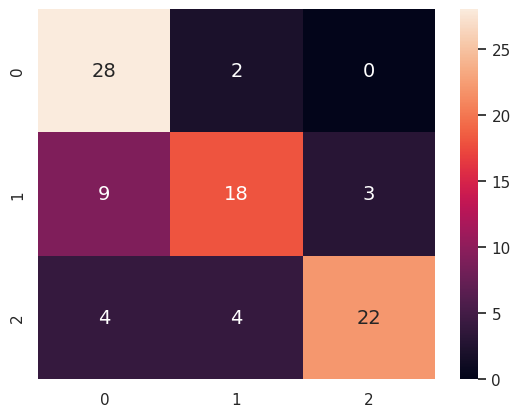

In [20]:
conf_mat = confusion_matrix(test_data.classes, Y_pred)
sn.set(font_scale= 1)
sn.heatmap(conf_mat, annot=True, annot_kws={"size": 14})
plt.show()